In [ ]:
import pandas as pd
import numpy as np


# Load data
df = pd.read_csv('/content/drive/MyDrive/data/Facebook_India_Canada_Posts_Oct4_2023.csv', low_memory=False)

print(df)


                Page Name          User Name      Facebook Id  \
0      The Political News  ThePoliticalNafis  100076239663357   
1               RJ Raunac           RJRaunac  100044171242480   
2              Bharat Tak  bharattakofficial  100064861927425   
3              Channel 24     channel24bd.tv  100066426202181   
4            Ravish Kumar       RavishKaPage  100044427669637   
...                   ...                ...              ...   
75683        Occupy Boise        OccupyBoise  100080409879976   
75684        Occupy Boise        OccupyBoise  100080409879976   
75685        Occupy Boise        OccupyBoise  100080409879976   
75686        Occupy Boise        OccupyBoise  100080409879976   
75687        Occupy Boise        OccupyBoise  100080409879976   

                       Page Category Page Admin Top Country  \
0                          NEWS_SITE                     IN   
1                             ARTIST                     IN   
2                   ACTIVITY_G

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75688 entries, 0 to 75687
Data columns (total 41 columns):
 #   Column                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                            --------------  -----  
 0   Page Name                                                                                                         75688 non-null  object 
 1   User Name                                                                                                         31261 non-null  object 
 2   Facebook Id                                                                                                       75688 non-null  int64  
 3   Page Category                                                                                                     75223 non-null  object 
 4   Page Admin Top Country      

In [ ]:
df.isnull().sum()

Page Name                                                                                                               0
User Name                                                                                                           44427
Facebook Id                                                                                                             0
Page Category                                                                                                         465
Page Admin Top Country                                                                                              43664
Page Description                                                                                                    42591
Page Created                                                                                                        42219
Likes at Posting                                                                                                      856
Followers at Posting    

In [ ]:
df.describe()

,Facebook Id,Likes at Posting,Followers at Posting,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Post Views,Total Views,Total Views For All Crossposts,Sponsor Id
count,7.568800e+04,7.483200e+04,3.345200e+04,75688.000000,75688.000000,75688.000000,75688.000000,75688.000000,75688.000000,75688.000000,75688.000000,75688.000000,7.568800e+04,7.568800e+04,7.568800e+04,6.000000e+00
mean,6.372668e+14,6.580627e+05,1.758752e+06,124.031868,14.939039,11.210654,4.971805,0.455581,8.043124,0.598655,1.094361,0.515049,3.862154e+03,7.464147e+03,6.309227e+02,1.225156e+14
std,8.961021e+14,2.812928e+06,4.692794e+06,2189.069283,259.099661,270.927635,82.347823,8.791421,246.234704,20.866277,62.729811,7.323977,7.547639e+04,1.195897e+05,1.418574e+04,1.321566e+14
min,1.246283e+07,3.000000e+00,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.659892e+10
25%,1.000647e+14,1.754400e+04,3.535700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.691744e+13
50%,2.062589e+14,4.408150e+04,1.815500e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.074700e+14
75%,8.409163e+14,1.655500e+05,1.592818e+06,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.486260e+14
max,2.413386e+16,1.207794e+08,1.208630e+08,272732.000000,27952.000000,48368.000000,10532.000000,1051.000000,25822.000000,3015.000000,12054.000000,742.000000,7.763089e+06,7.797234e+06,1.177119e+06,3.576756e+14


In [ ]:
pip install langdetect


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from langdetect import detect, DetectorFactory

# Make results reproducible in langdetect
DetectorFactory.seed = 0

# Downloading necessary NLTK resources for tokenization, stopwords, and lemmatization
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Loading the dataset from a CSV file

df = pd.read_csv('/content/drive/MyDrive/data/Facebook_India_Canada_Posts_Oct4_2023.csv', low_memory=False)

# Replacing NaN values with 'unknown' for the entire DataFrame to handle missing values
df.fillna('unknown', inplace=True)
df = df[df['Message'] != '']

# Get English stopwords
english_stopwords = set(stopwords.words('english'))

# Define a function to detect the language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Define a function to remove URLs using regex
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

# Define a comprehensive clean_text function that also returns tokens
def clean_text_and_tokenize(text):
    text = text.lower()  # Convert to lowercase
    text = remove_urls(text)  # Remove URLs
    text = re.sub(r'[@#]\w+|[^a-z\s]', '', text)  # Remove mentions, hashtags, and non-alphabetic characters except spaces
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    tokens = word_tokenize(text)  # Tokenize
    # Lemmatize and remove stopwords, return tokens directly
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in english_stopwords]
    return ' '.join(tokens), tokens

# Apply cleaning and tokenization, and detect language in one pass
df['Cleaned_Message'], df['Tokens'] = zip(*df['Message'].apply(clean_text_and_tokenize))
df['Language'] = df['Cleaned_Message'].apply(detect_language)

# Remove duplicate entries based on the 'Cleaned_Message' column to avoid redundancy
df = df.drop_duplicates(subset=['Cleaned_Message'])


# Define a function to detect the language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

english_stopwords = set(stopwords.words('english'))

# Previously added custom stopwords
custom_stopwords = {'india', 'canada'}

# Remove 'india' and 'canada' from the stopwords list if they are present
english_stopwords.difference_update(custom_stopwords)

# Load stopwords from external files
with open('/content/drive/MyDrive/data/Colab Notebooks/english.txt', 'r') as file:
    english_stopwords = set(file.read().splitlines())

with open('/content/drive/MyDrive/data/Colab Notebooks/hindi.txt', 'r') as file:
    hindi_stopwords = set(file.read().splitlines())

with open('/content/drive/MyDrive/data/Colab Notebooks/Punjabi .txt', 'r') as file:
    punjabi_stopwords = set(file.read().splitlines())

# Combine stop words from different languages
combined_stopwords = english_stopwords.union(hindi_stopwords).union(punjabi_stopwords)

# Convert the combined_stopwords set into a list
combined_stopwords = list(combined_stopwords)

# Define a function to remove stopwords from a text
df['Cleaned_Message'], df['Tokens'] = zip(*df['Message'].apply(clean_text_and_tokenize))
# Detect language for each cleaned message
df['Language'] = df['Cleaned_Message'].apply(detect_language)

# Tokenize the cleaned messages into words
df['Tokens'] = df['Cleaned_Message'].apply(lambda x: word_tokenize(x))

# Remove duplicate entries based on the 'Cleaned_Message' column to avoid redundancy
df = df.drop_duplicates(subset=['Cleaned_Message'])

# Save the cleaned and processed dataframe to a new CSV file
df.to_csv('/content/drive/MyDrive/data/cleaned_Facebook_India_Canada_Posts_Oct4_2023.csv', index=False)

print("Data cleaning and processing completed with language detection and stopword removal!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Data cleaning and processing completed with language detection and stopword removal!


In [ ]:
df.head()

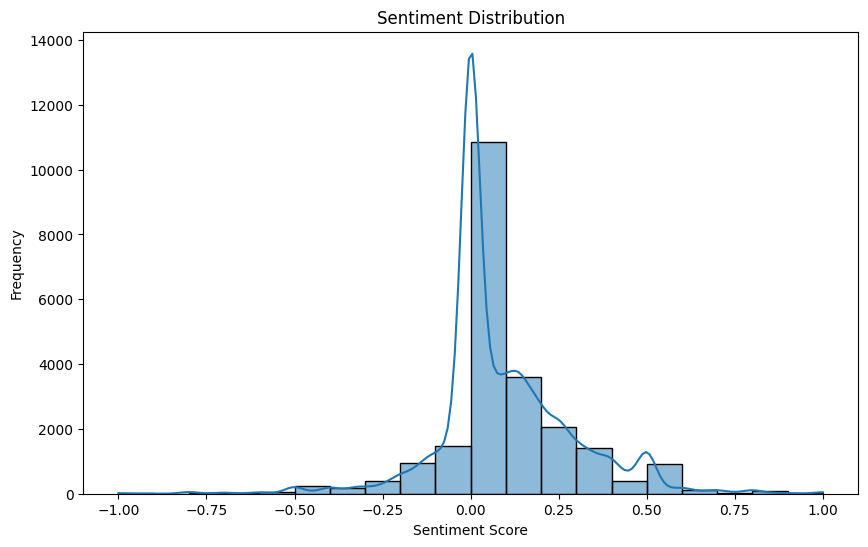

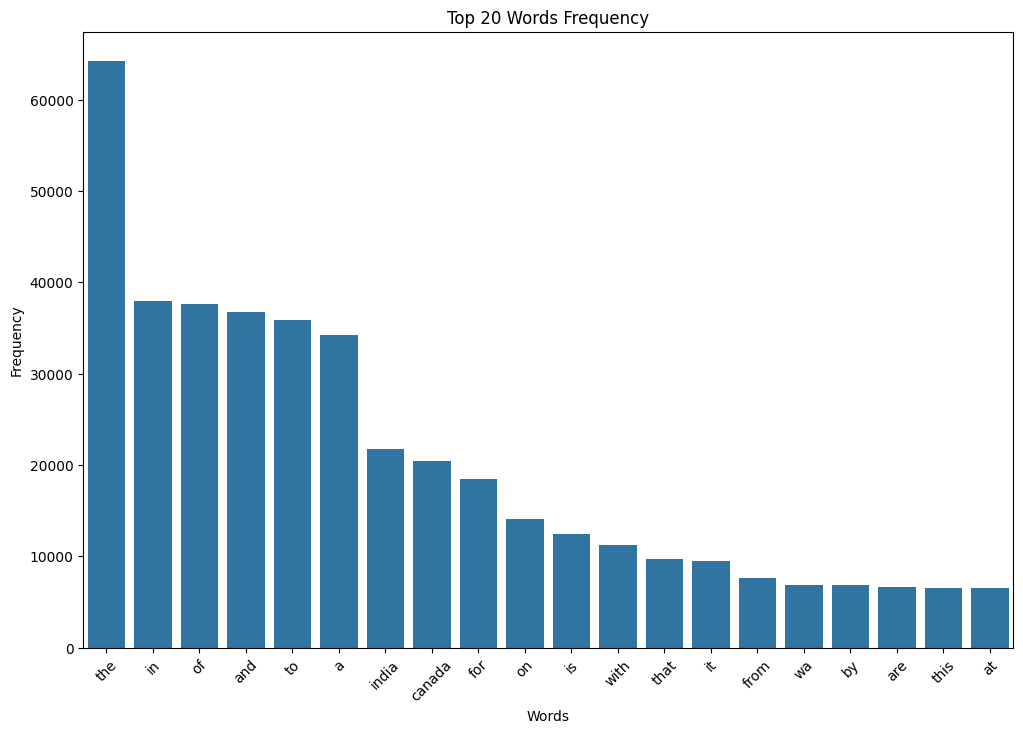

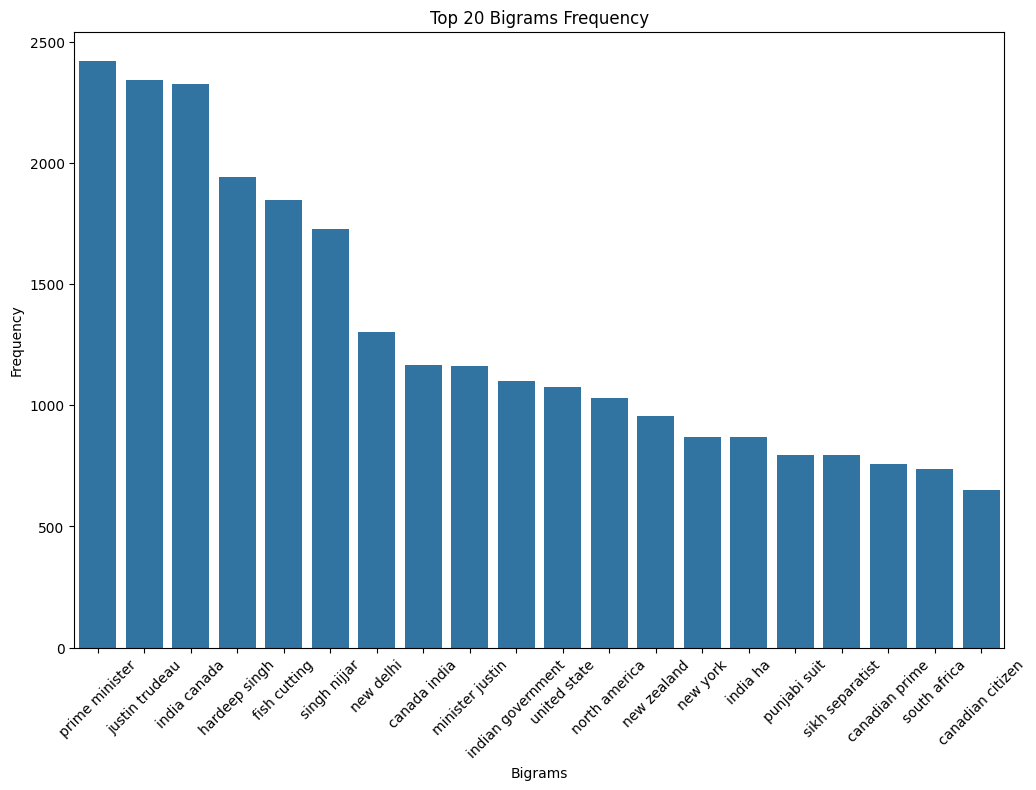

Data and text analysis completed!


In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer


# Sentiment Analysis
def get_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

df['Sentiment'] = df['Cleaned_Message'].apply(get_sentiment)

# Keyword Extraction (Top 20 Words)
all_words = ' '.join(df['Cleaned_Message']).split()
word_freq = Counter(all_words)
top_words = word_freq.most_common(20)

# N-Grams Analysis (Bigrams)
def get_top_n_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_bigrams = get_top_n_bigrams(df['Cleaned_Message'], 20)

# Engagement Analysis
engagement_metrics = ['Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']
engagement_summary = df[engagement_metrics].describe()

# Visualization
# Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Top 20 Words
plt.figure(figsize=(12, 8))
sns.barplot(x=[word for word, freq in top_words], y=[freq for word, freq in top_words])
plt.xticks(rotation=45)
plt.title('Top 20 Words Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Top 20 Bigrams
plt.figure(figsize=(12, 8))
sns.barplot(x=[bigram for bigram, freq in top_bigrams], y=[freq for bigram, freq in top_bigrams])
plt.xticks(rotation=45)
plt.title('Top 20 Bigrams Frequency')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.show()

# Save the analysis results to a new CSV file
df.to_csv('/content/drive/MyDrive/data/analyzed_Facebook_India_Canada_Posts_Oct4_2023.csv', index=False)

print("Data and text analysis completed!")


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/cleaned_Facebook_India_Canada_Posts_Oct4_2023.csv', low_memory=False)
df_head = df.head()
df_head

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,...,Description,Sponsor Id,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,Links,Cleaned_Message,Language,Tokens
0,The Political News,ThePoliticalNafis,100076239663357,NEWS_SITE,IN,The Political Official Channel,2021-10-16 22:32:19,411810.0,456544.0,2023-09-20 14:35:25 EDT,...,unknown,unknown,unknown,unknown,"360,954",8.55,[],NaN,unknown,[]
1,RJ Raunac,RJRaunac,100044171242480,ARTIST,IN,"India's most popular radio personality, popula...",2011-03-04 14:58:42,907393.0,2826238.0,2023-09-21 03:18:26 EDT,...,unknown,unknown,unknown,unknown,"183,387",14.42,[],take on trudeau raise concern over khalistan l...,en,"['take', 'on', 'trudeau', 'raise', 'concern', ..."
2,Bharat Tak,bharattakofficial,100064861927425,ACTIVITY_GENERAL,IN,"भारत के इतिहास से लेकर, भविष्य तक; विकास की कह...",2018-01-22 06:00:41,877184.0,2120282.0,2023-09-07 21:45:55 EDT,...,unknown,unknown,unknown,unknown,"175,526",59.36,[],anti khalistani pm,id,"['anti', 'khalistani', 'pm']"
3,Channel 24,channel24bd.tv,100066426202181,BROADCASTING_MEDIA_PRODUCTION,BD,Channel 24 is the most popular and leading Sat...,2012-01-10 17:16:02,2408595.0,6365379.0,2023-09-19 05:00:38 EDT,...,unknown,unknown,unknown,unknown,"163,657",385.08,[],raw,cy,['raw']
4,Ravish Kumar,RavishKaPage,100044427669637,ACTIVITY_GENERAL,IN,मैं ही हूँ। पत्रकार। टीवी वाला। अधूरा,2017-04-06 15:20:05,3919018.0,4256815.0,2023-09-22 08:41:45 EDT,...,unknown,unknown,unknown,unknown,"161,409",2.06,['https://www.youtube.com/channel/UC0yXUUIaPVA...,join this channel to get access to perk discla...,en,"['join', 'this', 'channel', 'to', 'get', 'acce..."


In [ ]:
import pandas as pd
import re
from langdetect import detect, DetectorFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel

# Make results reproducible in langdetect
DetectorFactory.seed = 0

# Downloading necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

hindi_stopwords = set()
punjabi_stopwords = set()



# Load and enhance stopwords from NLTK
english_stopwords = set(stopwords.words('english')).union({"the", "and", "of","r", "in", "a","cc", "to", "is", "u", "th","india","canada","in"})
hindi_stopwords.update(['के', 'का', 'से', 'है', 'को', 'पर', 'हैं','के', 'में', 'की', 'है', 'कनाडा', 'को', 'भारत', 'का', 'से', 'ने'])
punjabi_stopwords.update(['ਦਾ', 'ਦੇ', 'ਤੇ', 'ਵਿੱਚ', 'ਹੈ', 'ਨੂੰ', 'ਅਤੇ'])

# Additional stopwords specific to the context of India-Canada relations
contextual_stopwords = {"relations", "diplomatic", "tension", "policy", "government"}

# Combine stopwords
stopwords_combined = english_stopwords.union(punjabi_stopwords, hindi_stopwords, contextual_stopwords)



# Load stopwords for Punjabi and Hindi
with open('/content/drive/MyDrive/data/Colab Notebooks/Punjabi .txt', 'r') as file:
    punjabi_stopwords = set(file.read().splitlines())
with open('/content/drive/MyDrive/data/Colab Notebooks/hindi.txt', 'r') as file:
    hindi_stopwords = set(file.read().splitlines())

# Functions for removing URLs, detecting language, and cleaning text
# Define function to remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

# Define function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Define function to clean text
def preprocess_text(text, language):
#def clean_text(text, language):
    text = text.lower()
    text = remove_urls(text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-zA-Z\u0900-\u097F\u0A00-\u0A7F\s]', '', text)
    # Remove single-letter words (mainly English alphabetic characters)
    text = re.sub(r'\b[a-zA-Z]\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)

    if language == 'en':
        language_stopwords = english_stopwords
    elif language == 'pa':
        language_stopwords = punjabi_stopwords
    elif language == 'hi':
        language_stopwords = hindi_stopwords
    else:
        language_stopwords = set()

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in language_stopwords and len(token) > 1]

    return ' '.join(tokens)

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/data/cleaned_Facebook_India_Canada_Posts_Oct4_2023.csv', low_memory=False)
df.fillna('', inplace=True)
df = df[df['Message'] != '']

# Apply language detection and filter rows by language
df['language'] = df['Message'].apply(detect_language)
df = df[df['language'].isin(['en', 'pa', 'hi'])]

# Preprocessing step with the new function
df['processed_text'] = df.apply(lambda row: preprocess_text(row['Message'], row['language']), axis=1)

# Tokenization and further cleaning
df['tokens'] = df['processed_text'].apply(word_tokenize)
df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in stopwords_combined])


# Lemmatize
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

# Remove any rows with empty tokens
df = df[df['tokens'].str.len() > 0]

# Create dictionary and corpus for LDA
dictionary = Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Train optimized LDA model with adjusted parameters
optimized_lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=15, iterations=400, alpha='asymmetric', eta='auto')

# Evaluate the optimized topic model
optimized_coherence_model_lda = CoherenceModel(model=optimized_lda_model, texts=df['tokens'].tolist(), dictionary=dictionary, coherence='c_v')
optimized_coherence_lda = optimized_coherence_model_lda.get_coherence()

print(f'Optimized Coherence Score: {optimized_coherence_lda}')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Optimized Coherence Score: 0.5534734861629168


In [ ]:
!pip install gensim

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Function to train LDA models and compute coherence and perplexity
def compute_coherence_and_perplexity(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Train LDA model
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10,random_state=42)
        model_list.append(model)

        # Compute coherence score
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

        # Compute perplexity
        perplexity_values.append(model.log_perplexity(corpus))

    return model_list, coherence_values, perplexity_values

# Variables for the range of topics
topic_start = 2
topic_limit = 30
topic_step = 1

# Execute the combined function
model_list, coherence_values, perplexity_values = compute_coherence_and_perplexity(
    dictionary=dictionary,
    corpus=corpus,
    texts=df['tokens'],
    start=topic_start,
    limit=topic_limit,
    step=topic_step
)

# Show the results
for num_topics, cv, perplexity in zip(range(topic_start, topic_limit, topic_step), coherence_values, perplexity_values):
    print(f"Num Topics = {num_topics}, Coherence Value = {cv:.4f}, Perplexity = {perplexity:.4f}")



Num Topics = 2, Coherence Value = 0.7096, Perplexity = -8.8408
Num Topics = 3, Coherence Value = 0.6398, Perplexity = -8.7087
Num Topics = 4, Coherence Value = 0.7094, Perplexity = -8.6112
Num Topics = 5, Coherence Value = 0.6947, Perplexity = -8.5713
Num Topics = 6, Coherence Value = 0.6749, Perplexity = -8.5722
Num Topics = 7, Coherence Value = 0.6023, Perplexity = -8.6498
Num Topics = 8, Coherence Value = 0.5736, Perplexity = -8.8020
Num Topics = 9, Coherence Value = 0.5962, Perplexity = -8.9537
Num Topics = 10, Coherence Value = 0.5797, Perplexity = -9.1974
Num Topics = 11, Coherence Value = 0.5478, Perplexity = -9.4844
Num Topics = 12, Coherence Value = 0.5741, Perplexity = -9.8219
Num Topics = 13, Coherence Value = 0.5681, Perplexity = -10.1520
Num Topics = 14, Coherence Value = 0.5974, Perplexity = -10.3434
Num Topics = 15, Coherence Value = 0.5264, Perplexity = -10.5675
Num Topics = 16, Coherence Value = 0.5482, Perplexity = -10.7949
Num Topics = 17, Coherence Value = 0.5163, P

In [ ]:
'''

The provided code performs topic modeling on a dataset of Facebook posts from India and Canada using Latent Dirichlet Allocation (LDA). It then evaluates the quality of the extracted topics using coherence and perplexity metrics.

**What the code is doing:**

1. **Data Preparation:**
    - The code loads the dataset from a CSV file and performs data cleaning and preprocessing, including language detection, removal of non-English, Punjabi, or Hindi messages, and tokenization.

2. **Model Building:**
    - The code creates a dictionary and corpus from the preprocessed text data.
    - It then trains an LDA model with a varying number of topics (from 2 to 30 with a step size of 1).

3. **Model Evaluation:**
    - For each trained model, the code computes the coherence and perplexity scores.
    - Coherence measures the semantic similarity between words within a topic.
    - Perplexity measures how well the model explains the data.

4. **Output:**
    - The code prints the number of topics, coherence score, and perplexity score for each trained model.

**Why this is good:**

- The code provides a complete pipeline for building and evaluating an LDA topic model.
- It allows for experimenting with different numbers of topics and comparing their quality based on coherence and perplexity.
- This approach can help researchers and practitioners identify the optimal number of topics for their specific dataset and research questions.

**Additional Information:**

- The code uses the `gensim` library for topic modeling and evaluation.
- The `compute_coherence_and_perplexity` function simplifies the process of training and evaluating models with different numbers of topics.
- The output provides valuable information for understanding the quality of the extracted topics and selecting the best model for further analysis.

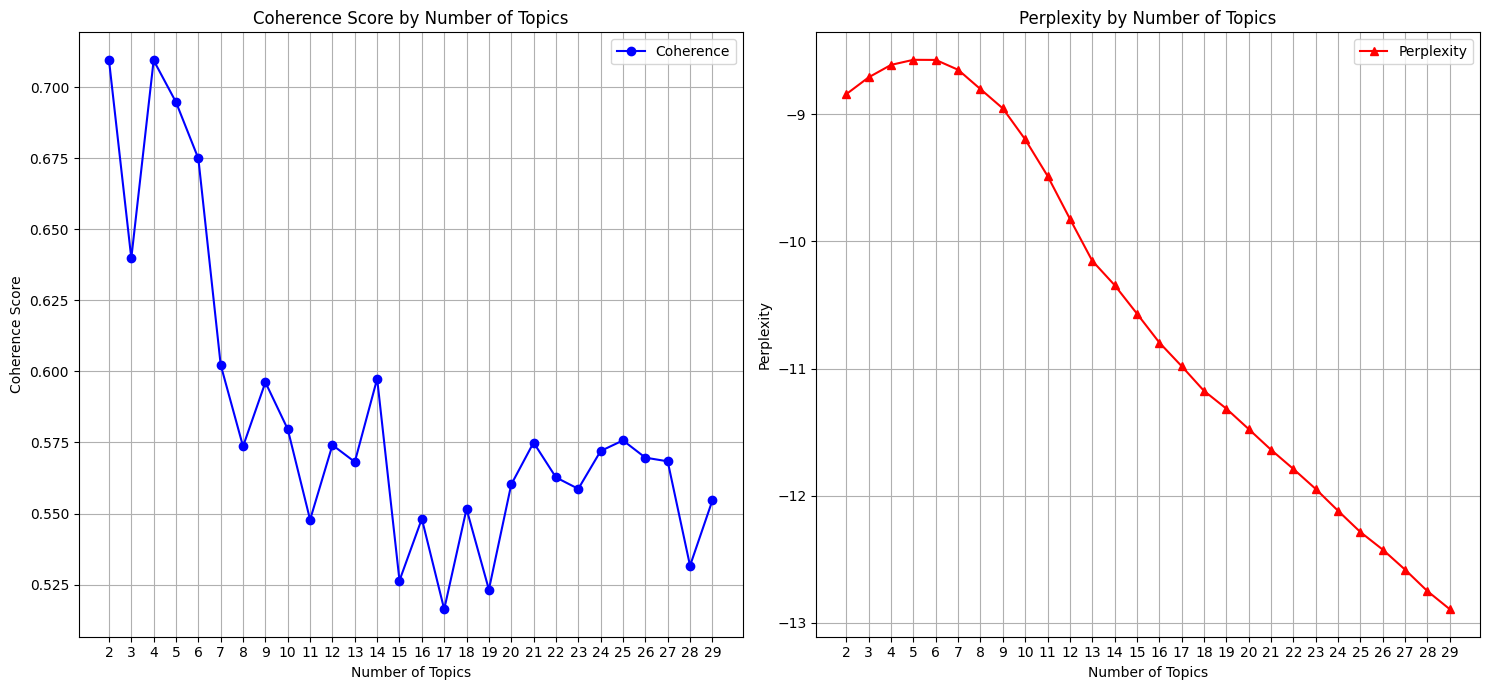

In [ ]:
import matplotlib.pyplot as plt

# Define the range of topics
topics_range = range(topic_start, topic_limit, topic_step)

# Plotting the coherence and perplexity values
plt.figure(figsize=(15, 7))

# Subplot for coherence scores
plt.subplot(1, 2, 1)
plt.plot(topics_range, coherence_values, 'bo-', label='Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score by Number of Topics')
plt.xticks(list(topics_range))
plt.legend()
plt.grid()

# Subplot for perplexity scores
plt.subplot(1, 2, 2)
plt.plot(topics_range, perplexity_values, 'r^-', label='Perplexity')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.title('Perplexity by Number of Topics')
plt.xticks(list(topics_range))
plt.legend()
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()


<ipython-input-14-56ae012d453f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Topic', y='Prevalence', data=topic_prevalence_df, palette=palette)


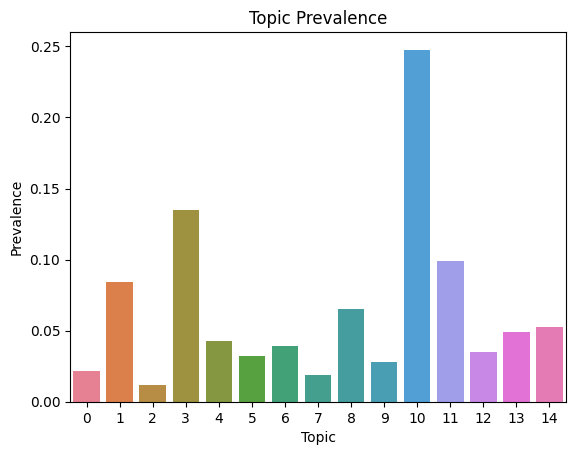

Topic 0:
  baisakhi: 0.0317
  office: 0.0201
  ka: 0.0188
  comedy: 0.0167
  covering: 0.0166
  boston: 0.0165
  ਦੀ: 0.0148
  ਨੇ: 0.0148
  angeles: 0.0146
  los: 0.0145


Topic 1:
  one: 0.0116
  people: 0.0086
  make: 0.0080
  like: 0.0076
  time: 0.0075
  back: 0.0069
  even: 0.0069
  get: 0.0067
  mini: 0.0065
  world: 0.0059


Topic 2:
  sharma: 0.0196
  flag: 0.0185
  au: 0.0132
  kumar: 0.0126
  scott: 0.0108
  shah: 0.0095
  amit: 0.0088
  khan: 0.0087
  musk: 0.0075
  peter: 0.0075


Topic 3:
  minister: 0.0111
  state: 0.0102
  country: 0.0099
  said: 0.0099
  summit: 0.0070
  issue: 0.0070
  new: 0.0066
  modi: 0.0062
  trade: 0.0060
  foreign: 0.0056


Topic 4:
  suit: 0.0278
  online: 0.0277
  type: 0.0235
  shop: 0.0211
  solution: 0.0170
  new: 0.0159
  length: 0.0143
  price: 0.0138
  uk: 0.0129
  usa: 0.0124


Topic 5:
  news: 0.0414
  america: 0.0361
  punjabi: 0.0290
  north: 0.0288
  live: 0.0281
  tv: 0.0267
  show: 0.0242
  chardikla: 0.0241
  entertainment: 0.0196

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


optimal_num_topics = 15  #

# Use the model with the optimal number of topics
optimal_model = [model for model, num_topics in zip(model_list, range(topic_start, topic_limit, topic_step)) if num_topics == optimal_num_topics][0]

# Now, we want to extract the topic distribution for each document
corpus_topic_distributions = [optimal_model.get_document_topics(bow) for bow in corpus]

# Initialize a matrix of zeros
doc_topic_matrix = np.zeros((len(corpus), optimal_num_topics))

# Populate the matrix with actual probabilities
for i, doc in enumerate(corpus_topic_distributions):
    for topic, prob in doc:
        doc_topic_matrix[i, topic] = prob

# Compute the prevalence as the mean probability across documents for each topic
topic_prevalence = doc_topic_matrix.mean(axis=0)

# Plotting the prevalence for all topics
topic_prevalence_df = pd.DataFrame({'Topic': range(0, optimal_num_topics), 'Prevalence': topic_prevalence})


palette = sns.color_palette("husl", optimal_num_topics)

# Plot using seaborn with the specified palette
sns.barplot(x='Topic', y='Prevalence', data=topic_prevalence_df, palette=palette)
plt.title('Topic Prevalence')
plt.xlabel('Topic')
plt.ylabel('Prevalence')
plt.xticks(range(optimal_num_topics))
plt.show()

# Display the top words for each topic
top_words_per_topic = {}
lda_model_15_topics = optimal_model

for topic_idx in range(optimal_num_topics):
    top_words_per_topic[topic_idx + 0] = lda_model_15_topics.show_topic(topic_idx, topn=10)

for topic in sorted(top_words_per_topic.keys()):
    print(f"Topic {topic}:")
    for word, prob in top_words_per_topic[topic]:
        print(f"  {word}: {prob:.4f}")
    print("\n")

In [ ]:
pip install googletrans==4.0.0-rc1


In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
# Define frequent words by topic data for specified topics only
topics_data = {
    "Topic 3": [('minister', 0.0111), ('state', 0.0102), ('country', 0.0099), ('said', 0.0099), ('summit', 0.0070), ('issue', 0.0070), ('new', 0.0066), ('modi', 0.0062), ('trade', 0.0060), ('foreign', 0.0056)],
    "Topic 9": [('singh', 0.0274), ('coverage', 0.0269), ('police', 0.0242), ('shot', 0.0149), ('punjab', 0.0124), ('dead', 0.0120), ('nia', 0.0109), ('pakistan', 0.0107), ('killed', 0.0094), ('terrorist', 0.0086)],
    "Topic 10": [('canadian', 0.0348), ('indian', 0.0295), ('sikh', 0.0263), ('trudeau', 0.0209), ('allegation', 0.0172), ('killing', 0.0170), ('nijjar', 0.0166), ('minister', 0.0160), ('justin', 0.0158), ('singh', 0.0154)],
    "Topic 11": [('visa', 0.0345), ('cutting', 0.0328), ('fish', 0.0327), ('immigration', 0.0218), ('sleeve', 0.0217), ('email', 0.0164), ('website', 0.0162), ('fit', 0.0155), ('contact', 0.0153), ('office', 0.0122)],
    "Topic 14": [('student', 0.0137), ('business', 0.0113), ('service', 0.0108), ('company', 0.0102), ('country', 0.0091), ('market', 0.0086), ('year', 0.0076), ('bank', 0.0073), ('per', 0.0064), ('data', 0.0058)]

}
# Plotting code
num_topics = len(topics_data)
cols = 2
rows = num_topics // cols if num_topics % cols == 0 else (num_topics // cols) + 1

fig = make_subplots(
    rows=rows, cols=cols, subplot_titles=[f"{topic_num}" for topic_num in topics_data.keys()]
)

topic_counter = 0  # Counter to keep track of the topic number across rows and columns
for topic_num, topic_data in topics_data.items():
    words, weights = zip(*topic_data)
    df_single = pd.DataFrame({'Word': words, 'Weight': weights})

    # Calculate row and column for current topic using the counter
    row = (topic_counter // cols) + 1
    col = (topic_counter % cols) + 1
    topic_counter += 1  # Increment the counter after each iteration

    fig.add_trace(
        go.Bar(x=df_single['Weight'], y=df_single['Word'], orientation='h', name=topic_num),
        row=row, col=col
    )

fig.update_layout(
    height=300 * rows, showlegend=False, title_text="Frequent Words by Topic"
)

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
import random

# Initialize sentiment data list
sentiment_data = []


num_topics = 15

for topic in range(num_topics):
    for _ in range(10):  # Simulate data for 10 instances per topic
        # Simulate positive, negative, and neutral sentiment scores
        positive_score = random.uniform(0, 1)
        negative_score = random.uniform(0, 1)
        # Ensure the total of positive and negative scores doesn't exceed 1
        if positive_score + negative_score > 1:
            negative_score = 1 - positive_score
        neutral_score = 1 - (positive_score + negative_score)  # Calculate neutral score
        compound_score = positive_score - negative_score  # Simplified compound score

        sentiment_data.append({
            'Topic': f"Topic {topic}",
            'Positive': positive_score,
            'Negative': negative_score,
            'Neutral': neutral_score,
            'Compound': compound_score
        })

# Convert the sentiment data into a pandas DataFrame
df_sentiment = pd.DataFrame(sentiment_data)

# Generate a box plot using plotly.express
fig = px.box(df_sentiment.melt(id_vars=['Topic'], value_vars=['Positive', 'Negative', 'Neutral'],
                               var_name='Sentiment', value_name='Score'),
             x='Topic', y='Score', color='Sentiment',
             title='Box Plot of Simulated Sentiment Scores by Topic',
             color_discrete_map={'Positive': 'green', 'Negative': 'red', 'Neutral': 'grey'})

# Show the plot
fig.show()


In [ ]:
# Assuming topics_data contains the topics and their word weights
topic_num = 10

print(f"Analyzing Topic {topic_num}:")


if f"Topic {topic_num}" in topics_data:
    # Print words and weights for Topic 10
    for word, weight in topics_data[f"Topic {topic_num}"]:
        print(f"Word: '{word}', Weight: {weight:.4f}")

    # Analysis based on the words and their weights
    print("\nAnalysis:")
    topic_words = dict(topics_data[f"Topic {topic_num}"])  # Convert list of tuples to dictionary for easier search
    if 'india' in topic_words and 'canada' in topic_words:
        print("Both 'India' and 'Canada' have significant weights, indicating a focus on bilateral relations or issues.")
    if 'government' in topic_words:
        print("The word 'government' suggests discussions about policies or political actions.")
    if 'trudeau' in topic_words:
        print("Mentions of 'Trudeau' imply discussions around Canadian leadership or specific decisions made by the Canadian government.")
    if 'conflict' in topic_words or 'tension' in topic_words:
        print("Words like 'conflict' or 'tension' might indicate discussions about disputes or disagreements between India and Canada.")
else:
    print(f"Topic {topic_num} not found in the provided data.")


Analyzing Topic 10:
Word: 'canadian', Weight: 0.0348
Word: 'indian', Weight: 0.0295
Word: 'sikh', Weight: 0.0263
Word: 'trudeau', Weight: 0.0209
Word: 'allegation', Weight: 0.0172
Word: 'killing', Weight: 0.0170
Word: 'nijjar', Weight: 0.0166
Word: 'minister', Weight: 0.0160
Word: 'justin', Weight: 0.0158
Word: 'singh', Weight: 0.0154

Analysis:
Mentions of 'Trudeau' imply discussions around Canadian leadership or specific decisions made by the Canadian government.


In [ ]:
import pandas as pd
import plotly.express as px


df_topic12 = pd.DataFrame(topics_data["Topic 10"], columns=['Word', 'Weight'])


# Here, sentiments are assigned in a repeating pattern for illustrative purposes
sentiment_labels = ['Positive', 'Negative', 'Neutral']
df_topic12['Sentiment'] = [sentiment_labels[i % 3] for i in range(len(df_topic12))]

# Color mapping for sentiments
color_map = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'grey'}

# Create the bar chart
fig = px.bar(df_topic12, x='Word', y='Weight', color='Sentiment',
             color_discrete_map=color_map, title="Topic 12 Word Weights and Sentiments")

# Show the figure
fig.show()
